In [1]:
from RooPandasFunctions import PSequential,PColumn,PFilter,PRow,PProcessor,PProcRunner,PInitDir
import pandas as pd
from glob import glob
from ROOT import TH1F,TH2F,TLorentzVector,TFile,TCanvas,TLegend,gPad,THStack
from collections import OrderedDict
import numpy as np
import copy
import pyarrow as pa

Welcome to JupyROOT 6.22/00


In [2]:
FromFlatPandas = TFile("FromFlatPandas_AE90_M0_Njet3.root")

In [ ]:
FromFlatPandas.ls()

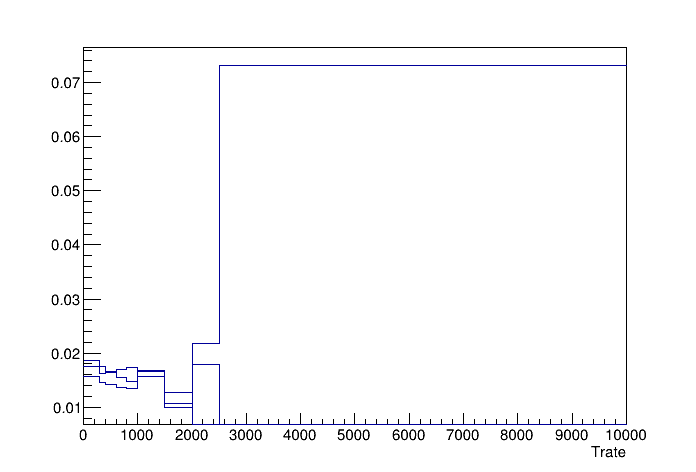

In [3]:
canv=TCanvas("canv","canv",700,500)
FromFlatPandas.RateE0.SetTitle(";Trate;")
FromFlatPandas.RateE0.SetStats(0)

FromFlatPandas.RateE0.Draw("hist")
FromFlatPandas.RateE1.Draw("histsame")
FromFlatPandas.RateE2.Draw("histsame")
gPad.SetLeftMargin(0.12)

canv.Draw()

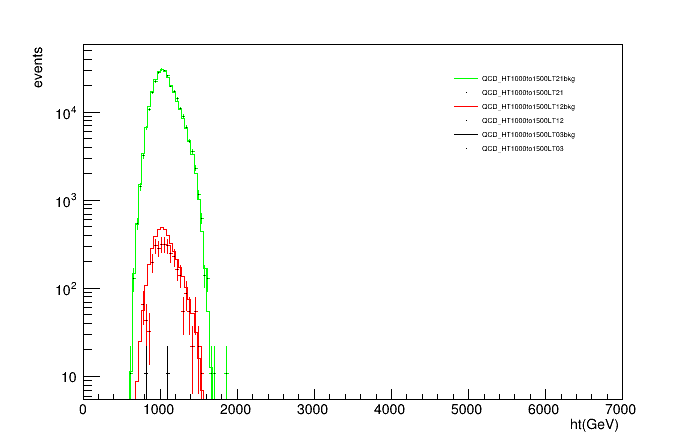

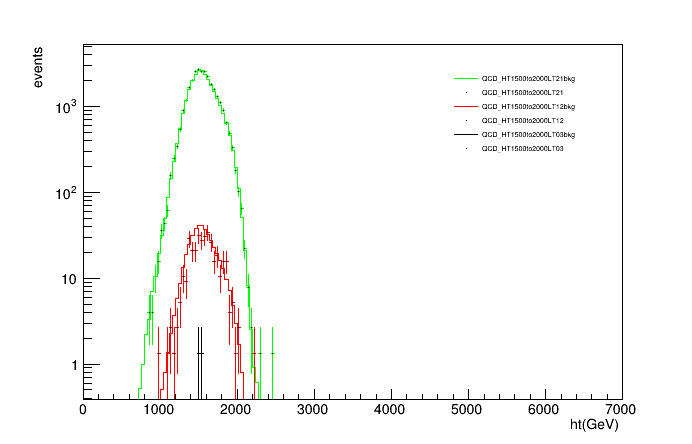

In [4]:
FromFlatPandas.htQCD_HT1000to1500.Draw("hist")
FromFlatPandas.htQCD_HT1500to2000.Draw("hist")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


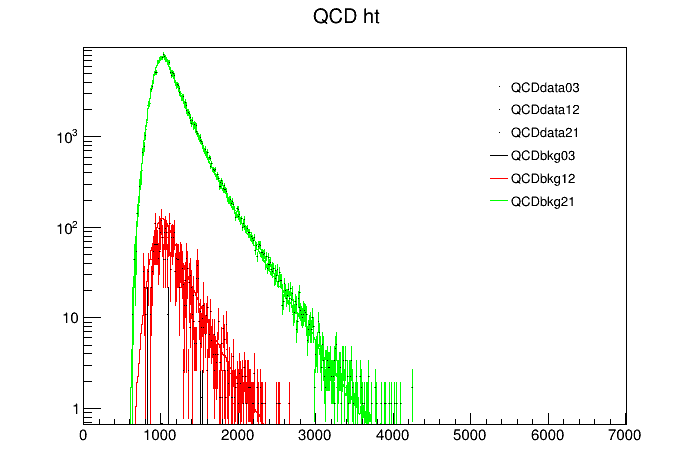

In [5]:
QCDdata03 = FromFlatPandas.QCD_HT1000to1500__ht_LT03 + FromFlatPandas.QCD_HT1500to2000__ht_LT03 + FromFlatPandas.QCD_HT2000toInf__ht_LT03
QCDdata12 = FromFlatPandas.QCD_HT1000to1500__ht_LT12 + FromFlatPandas.QCD_HT1500to2000__ht_LT12 + FromFlatPandas.QCD_HT2000toInf__ht_LT12
QCDdata21 = FromFlatPandas.QCD_HT1000to1500__ht_LT21 + FromFlatPandas.QCD_HT1500to2000__ht_LT21 + FromFlatPandas.QCD_HT2000toInf__ht_LT21

QCDbkg03 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT03 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT03 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT03
QCDbkg12 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT12 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT12 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT12
QCDbkg21 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT21 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT21 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT21

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

QCDdata03.SetTitle("QCD ht;;")
QCDdata03.SetStats(0)
QCDdata03.SetMaximum(max(max(QCDdata03),max(QCDdata12),max(QCDdata21),max(QCDbkg03),max(QCDbkg12),max(QCDbkg21))*1.2)
QCDdata03.GetXaxis().SetRangeUser(0,10000)


QCDdata03.SetLineColor(1)
QCDdata12.SetLineColor(2)
QCDdata21.SetLineColor(3)
QCDdata03.Draw("same")
canv.Update()
QCDdata12.Draw("same")
canv.Update()
QCDdata21.Draw("same")
canv.Update()

QCDbkg03.SetLineColor(1)
QCDbkg12.SetLineColor(2)
QCDbkg21.SetLineColor(3)
QCDbkg03.Draw("histsame")
canv.Update()
QCDbkg12.Draw("histsame")
canv.Update()
QCDbkg21.Draw("histsame")
canv.Update()

canv.SetLogy()

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(QCDdata03,'QCDdata03','P')
leg1.AddEntry(QCDdata12,'QCDdata12','P')
leg1.AddEntry(QCDdata21,'QCDdata21','P')

leg1.AddEntry(QCDbkg03,'QCDbkg03','L')
leg1.AddEntry(QCDbkg12,'QCDbkg12','L')
leg1.AddEntry(QCDbkg21,'QCDbkg21','L')

leg1.Draw()

canv.RedrawAxis()
canv.Update()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


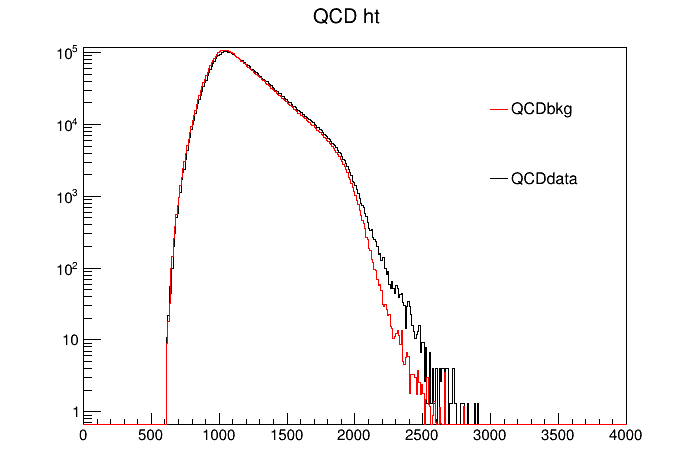

In [19]:
QCD15002000bkg = FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT03 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT12 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT21
QCD10001500bkg = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT03 + FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT12 + FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT21
QCD15002000 = FromFlatPandas.QCD_HT1500to2000__ht_LT03 + FromFlatPandas.QCD_HT1500to2000__ht_LT12 + FromFlatPandas.QCD_HT1500to2000__ht_LT21
QCD10001500 = FromFlatPandas.QCD_HT1000to1500__ht_LT03 + FromFlatPandas.QCD_HT1000to1500__ht_LT12 + FromFlatPandas.QCD_HT1000to1500__ht_LT21

QCDdata = QCD10001500 + QCD15002000
QCDbkg = QCD10001500bkg + QCD15002000bkg

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

QCDdata.SetTitle("QCD ht;;")
QCDdata.SetStats(0)
QCDdata.SetMaximum(max(max(QCDdata),max(QCDbkg))*1.1)

QCDdata.SetLineColor(1)
QCDdata.Draw("hist")

QCDbkg.SetLineColor(2)
QCDbkg.Draw("histsame")

canv.SetLogy()

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(QCDbkg,'QCDbkg','l')
leg1.AddEntry(QCDdata,'QCDdata','l')
leg1.Draw()

canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


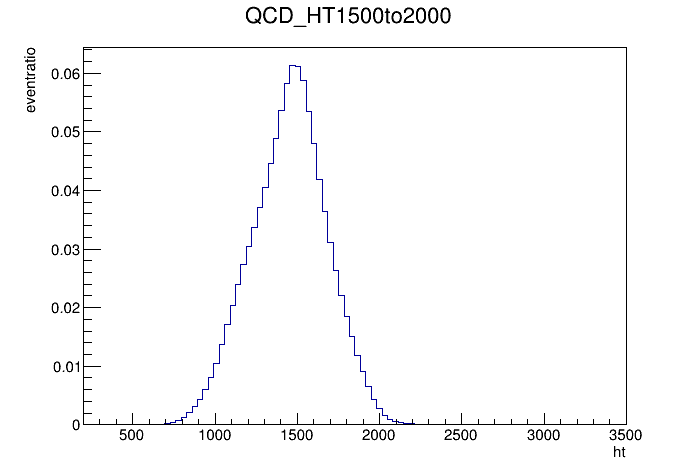

In [8]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.QCD_HT1500to2000__dijetht.SetTitle("QCD_HT1500to2000;ht;eventratio")
FromFlatPandas.QCD_HT1500to2000__dijetht.SetStats(0)
norm = 1/FromFlatPandas.QCD_HT1500to2000__dijetht.Integral()
FromFlatPandas.QCD_HT1500to2000__dijetht.Scale(norm)
FromFlatPandas.QCD_HT1500to2000__dijetht.Draw("hist")
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


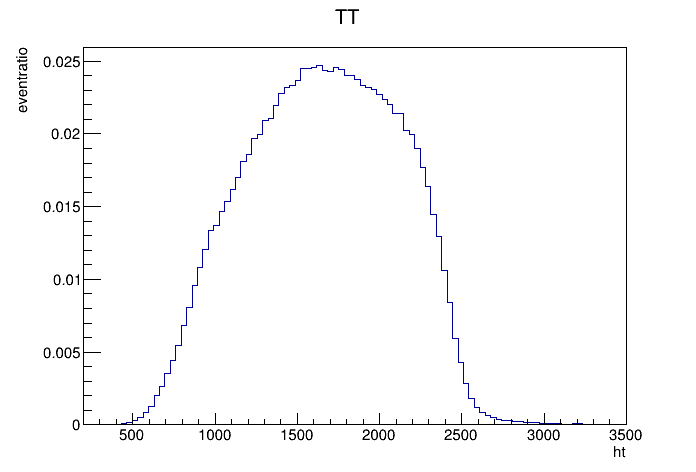

In [9]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.TT__dijetht.SetTitle("TT;ht;eventratio")
FromFlatPandas.TT__dijetht.SetStats(0)
norm = 1/FromFlatPandas.TT__dijetht.Integral()
FromFlatPandas.TT__dijetht.Scale(norm)
FromFlatPandas.TT__dijetht.Draw("hist")
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


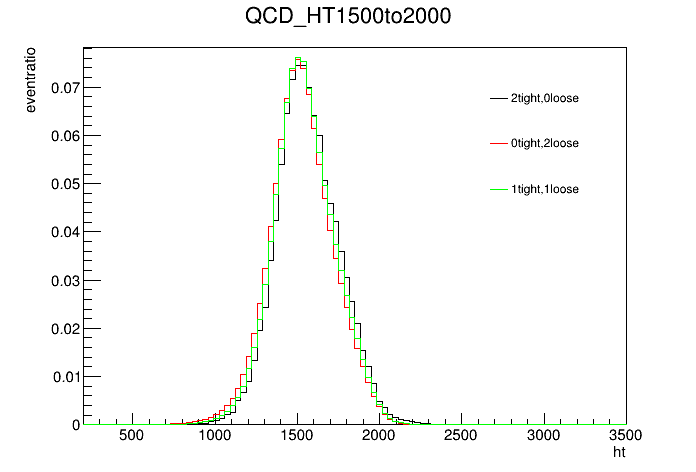

In [10]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.QCD_HT1500to2000__ht20.SetTitle("QCD_HT1500to2000;ht;eventratio")
FromFlatPandas.QCD_HT1500to2000__ht20.SetStats(0)
norm = 1/FromFlatPandas.QCD_HT1500to2000__ht20.Integral()
FromFlatPandas.QCD_HT1500to2000__ht20.Scale(norm)
FromFlatPandas.QCD_HT1500to2000__ht20.SetLineColor(1)
FromFlatPandas.QCD_HT1500to2000__ht20.Draw("hist")
norm = 1/FromFlatPandas.QCD_HT1500to2000__ht02.Integral()
FromFlatPandas.QCD_HT1500to2000__ht02.Scale(norm)
FromFlatPandas.QCD_HT1500to2000__ht02.SetLineColor(2)
FromFlatPandas.QCD_HT1500to2000__ht02.Draw("histsame")
QCDHT11Scaled = FromFlatPandas.QCD_HT1500to2000__ht11
norm = 1/QCDHT11Scaled.Integral()
QCDHT11Scaled.Scale(norm)
QCDHT11Scaled.SetLineColor(3)
QCDHT11Scaled.Draw("histsame")
leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(FromFlatPandas.QCD_HT1500to2000__ht20, '2tight,0loose', 'l')
leg1.AddEntry(FromFlatPandas.QCD_HT1500to2000__ht02, '0tight,2loose', 'l')
leg1.AddEntry(QCDHT11Scaled, '1tight,1loose', 'l')
leg1.Draw()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


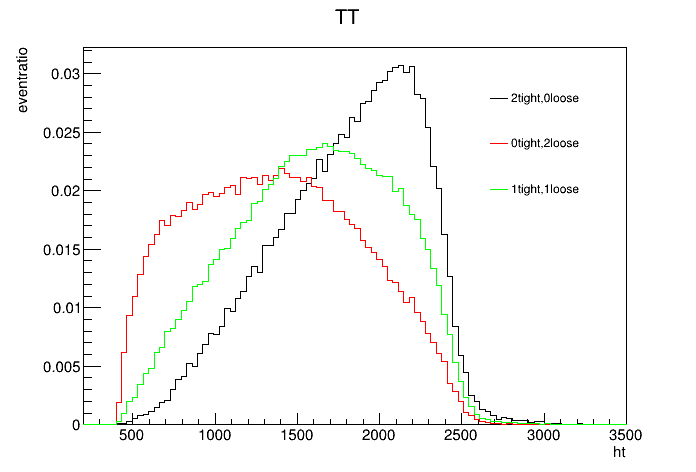

In [11]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.TT__ht20.SetTitle("TT;ht;eventratio")
FromFlatPandas.TT__ht20.SetStats(0)
norm = 1/FromFlatPandas.TT__ht20.Integral()
FromFlatPandas.TT__ht20.Scale(norm)
FromFlatPandas.TT__ht20.SetLineColor(1)
FromFlatPandas.TT__ht20.Draw("hist")
norm = 1/FromFlatPandas.TT__ht02.Integral()
FromFlatPandas.TT__ht02.Scale(norm)
FromFlatPandas.TT__ht02.SetLineColor(2)
FromFlatPandas.TT__ht02.Draw("histsame")
norm = 1/FromFlatPandas.TT__ht11.Integral()
FromFlatPandas.TT__ht11.Scale(norm)
FromFlatPandas.TT__ht11.SetLineColor(3)
FromFlatPandas.TT__ht11.Draw("histsame")
leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(FromFlatPandas.TT__ht20, '2tight,0loose', 'l')
leg1.AddEntry(FromFlatPandas.TT__ht02, '0tight,2loose', 'l')
leg1.AddEntry(FromFlatPandas.TT__ht11, '1tight,1loose', 'l')
leg1.Draw()
canv.Draw()